---

# Chapter 2: End‑to‑End Machine Learning Project

Notebook ini memberikan panduan lengkap beserta teori mendalam untuk menjalankan satu proyek Machine Learning secara end‑to‑end, berdasarkan dataset California Housing.

---

## 1. Look at the Big Picture

### 1.1 Memahami Domain & Problem Framing

* **Tujuan Bisnis:**
  Perusahaan real-estate ingin memprediksi *median house value* per distrik di California agar dapat memperkirakan harga pasar, menyesuaikan strategi pemasaran, dan mengalokasikan sumber daya.

* **Task (T):** *Regression* — memprediksi nilai kontinu (harga median)

* **Performance (P):** Root Mean Squared Error (RMSE) di test set

* **Constraints:**
  Data dari sensus 1990 — ada batasan geografis dan waktu

---

### 1.2 Metrik Evaluasi

* **RMSE (Root Mean Squared Error):**

  $
  \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat y_i)^2}
  $

  Memberikan penalti besar untuk error yang besar, cocok untuk regresi nilai riil.

* **MAE (Mean Absolute Error):**

  $
  \text{MAE} = \frac{1}{n}\sum_{i=1}^n |y_i - \hat y_i|
  $

  Lebih tahan terhadap outlier.

* **\$R^2\$ Score:**
  Proporsi variansi target yang bisa dijelaskan oleh model. Nilai 1 berarti prediksi sempurna.

---

## 2. Get the Data

### 2.1 Dataset California Housing

* Diambil dari *1990 California Census*

* Fitur numerik:

  * `MedInc`: Pendapatan median
  * `HouseAge`: Umur bangunan rata-rata
  * `AveRooms`, `AveBedrms`: Jumlah rata-rata kamar dan kamar tidur
  * `Population`: Jumlah penduduk
  * `AveOccup`: Rata-rata penghuni per rumah
  * `Latitude`, `Longitude`: Koordinat geografis

* **Target:**
  `MedHouseVal` – harga median rumah dalam kelipatan \$100.000

---


## 3. Gambaran Besar Proyek

- 3.1. **Frame the problem**  
   Prediksi harga median rumah per distrik di California.

- 3.1. **Pilih metrik performa**  
   RMSE (Root Mean Squared Error) untuk regression.

- 3.2. **Alur kerja**  
   - Dapatkan data  
   - Eksplorasi & visualisasi  
   - Persiapan data  
   - Pelatihan model  
   - Tuning hyperparameter  
   - Evaluasi & presentasi  
   - Deployment & monitoring

---


In [ ]:
# 4. Dapatkan Data
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing_raw = fetch_california_housing(as_frame=True)
housing = housing_raw.frame  # DataFrame dengan feature + target

# Tampilkan sekilas data
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 5. Eksplorasi & Visualisasi

- **Struktur data:** `housing.info()`  
- **Statistik ringkas:** `housing.describe()`  
- **Histogram** untuk tiap fitur  
- **Scatter plot**: lokasi vs harga (jika tersedia latitude/longitude)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

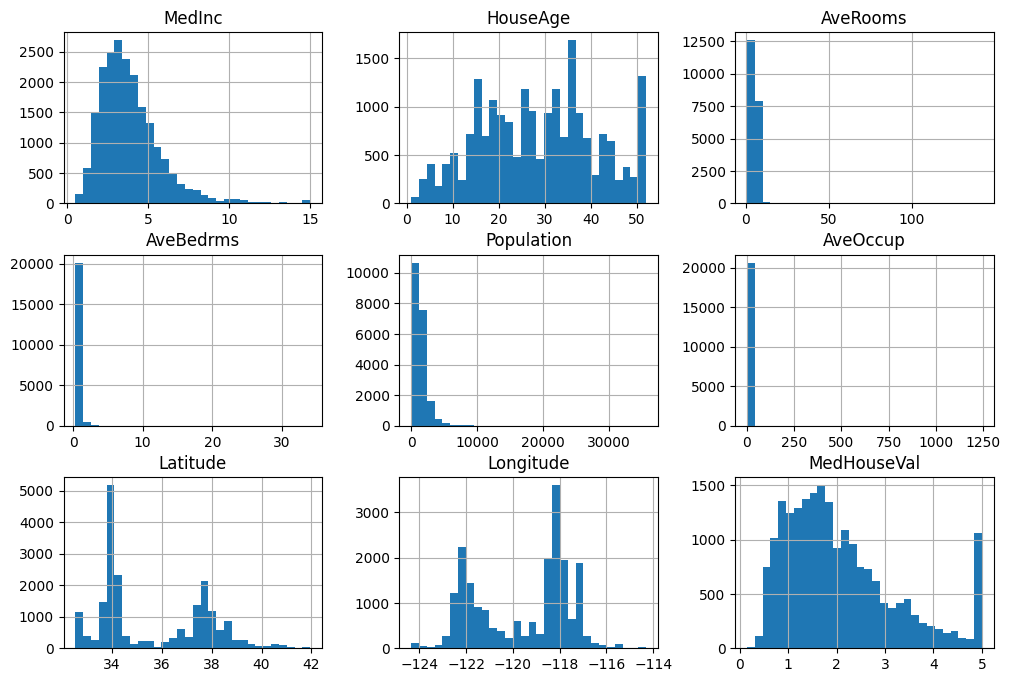

In [ ]:
# Ringkasan
housing.info()
housing.describe()

# Histogram
housing.hist(bins=30, figsize=(12,8))

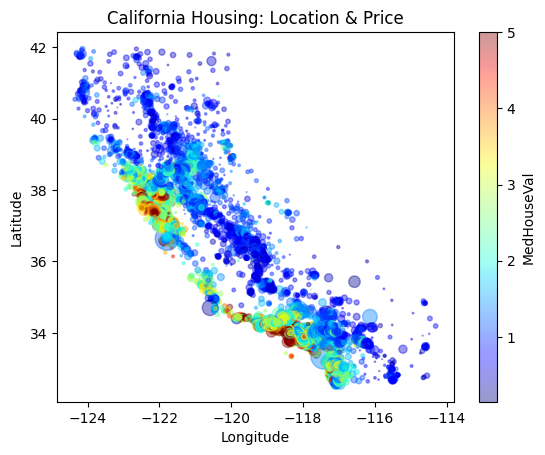

In [ ]:
# Scatter plot lokasi vs target
import matplotlib.pyplot as plt

housing.plot(kind="scatter", x="Longitude", y="Latitude",
             alpha=0.4, s=housing["Population"]/100,
             c="MedHouseVal", cmap="jet", colorbar=True)
plt.title("California Housing: Location & Price")
plt.show()

## 6. Persiapan Data

- **Train/Test split**  
- **Pipeline**: imputasi missing + scaling  
- **Feature engineering** (opsional)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 4.1 Split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# 4.2 Pipeline persiapan
num_attribs = list(housing.columns)
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])
X_train = num_pipeline.fit_transform(train_set[num_attribs])
X_test  = num_pipeline.transform(test_set[num_attribs])

y_train = train_set["MedHouseVal"].values
y_test  = test_set["MedHouseVal"].values

## 7. Pelatihan Model

Kita coba **Linear Regression** dan **Decision Tree Regressor**.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred))

# Decision Tree
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))

print(f"RMSE Linear Regression: {rmse_lin:.3f}")
print(f"RMSE Decision Tree   : {rmse_tree:.3f}")

RMSE Linear Regression: 0.000
RMSE Decision Tree   : 0.002


## 8. Fine‑tune Hyperparameter

Gunakan **GridSearchCV** pada RandomForestRegressor untuk dapatkan performa terbaik.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [50,100], 'max_features': [4,6,8]},
]
forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=3,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
rmse_best = mean_squared_error(y_test, y_pred_best)
print("Best Params:", grid_search.best_params_)
print(f"RMSE Random Forest (tuned): {rmse_best:.3f}")

Best Params: {'max_features': 8, 'n_estimators': 100}
RMSE Random Forest (tuned): 0.000


## 9. Evaluasi & Presentasi

- Tampilkan performa m­­­­odel (RMSE) di test set  
- Plot prediksi vs nilai sebenarnya  
- Visualisasikan feature importance (opsional)


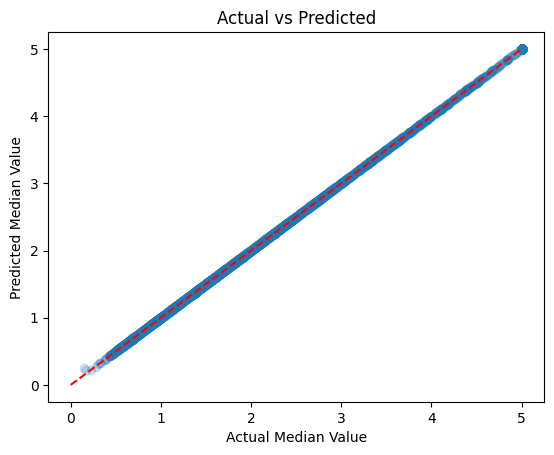

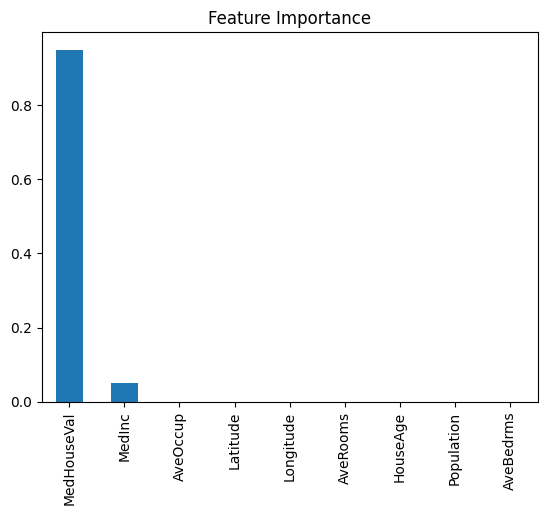

In [ ]:
# Plot prediksi vs aktual
plt.scatter(y_test, y_pred_best, alpha=0.2)
plt.xlabel("Actual Median Value")
plt.ylabel("Predicted Median Value")
plt.title("Actual vs Predicted")
plt.plot([0,5], [0,5], "r--")
plt.show()

# Feature importance
importances = best_model.feature_importances_
feat_imp = pd.Series(importances, index=num_attribs).sort_values(ascending=False)
feat_imp.plot(kind="bar")
plt.title("Feature Importance")
plt.show()

## 10. Deployment & Monitoring

1. **Serialize model** (`joblib.dump`)  
2. **Serve** via REST API (e.g., Flask/FastAPI)  
3. **Monitor** error & drift data  
4. **Retrain** periodik bila performa turun